Only run the following cell once

In [1]:
# Only run this cell once
import os
moduledir = os.path.dirname( os.getcwd() )

os.chdir(moduledir) # Move up one directory so we can import modules

# BLG in STM

To generate a $dI/dV$ spectrum over all gate voltages, we first import the `TunnelingExperiments` module. A tunneling experiment performed on BLG is provided by the object `TunnelingExperiments.BLGinSTM`. The parameters it takes are as follows

* The distance between the top gate (tip) and sample `d1` in units nm
* The distance between the bottom gate and sample `d2` in units nm
* The *relative* permittivity between the tip and sample `e1`
* The *relative* permittivity between the bottom gate and sample `e2`
* Temperature `T` in Kelvin
* The work function of the tip `Wtip` in units eV

A common example is to have a layer BLG on a ~20 nm thick piece of hBN on a 285 nm thick SiO$_2$ oxide. This sets `d_2=20+285=305` nm. The relative permittivity of both hBN and SiO$_2$ is roughly 4, so we set `e2=4`. The tip height varies substantially, but in this example, we'll set `d_1=1` nm. Since the tip sits in vacuum, `e1=1`. If the tip is made of Pt-Ir, then `Wtip=5` eV approximately.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from TunnelingExperiment import TunnelingExperiments

Computing tunnel currents


C:\python\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


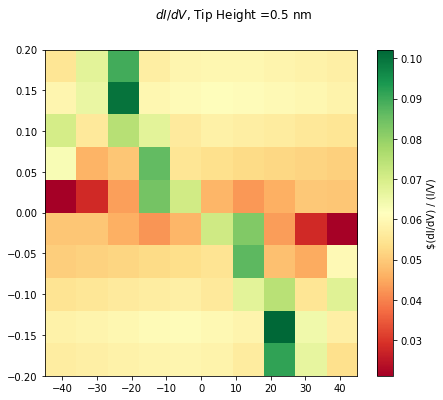

In [6]:
d1 = 0.5 # nm between tip and sample
d2 = 305 # nm between backgate and sample
e1 = 1 # relative permittivity between tip and sample
e2 = 4 # relative permittivity between backgate and sample
T = 0 # Kelvin
Wtip = 5 # eV for work function of the tip

experiment = TunnelingExperiments.BLGinSTM(d1,d2,e1,e2,T,Wtip)

VTrange = [-0.2,0.2]
num_vts_100 = 0.1
VT = np.linspace(VTrange[0],VTrange[-1],num=int(num_vts_100*100))


VBrange = [-45,45]
num_vbs_100 = 0.1
VB = np.linspace(VBrange[0],VBrange[-1],num=int(num_vbs_100*100))

experiment.generate_tunnelcurrent(VTrange,num_vts_100,VBrange,num_vbs_100,method='DasSarma')
experiment.plot_dIdV()

In [33]:
from Materials import Graphene
from UniversalConstants import *

BLG = Graphene.Bilayer()

d1 = 1 # nm between tip and sample
d2 = 305 # nm between backgate and sample
e1 = 1 # relative permittivity between tip and sample
e2 = 4 # relative permittivity between backgate and sample
T = 0 # Kelvin
Wtip = 5 # eV for work function of the tip

experiment2 = TunnelingExperiments.BLGinSTM(d1,d2,e1,e2,T,Wtip)


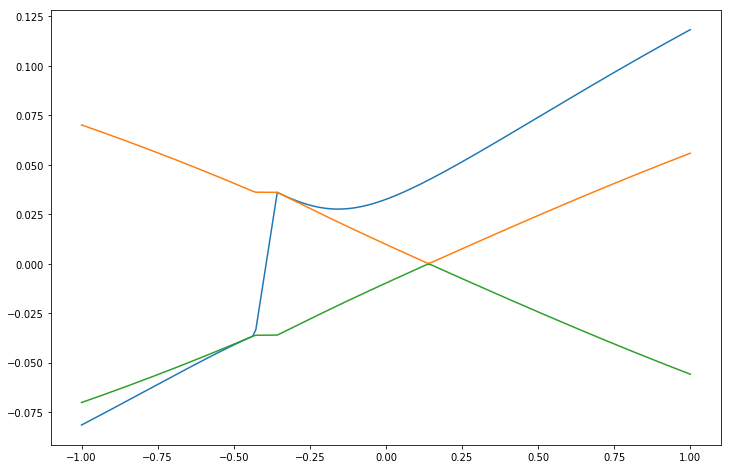

In [34]:

VT = np.linspace(-1,1,num=200)
VB = 30


emins = []
vplus = []
vminus= []
mins = []

for vt in VT:
    vp = experiment2.vplus_n1(vt,VB)
    vplus.append(vp)
    if experiment2.n_exists(vt,VB):
        vm = experiment2.vminus_n1(vp,vt,VB)
        vminus.append(vm)
    else:
        vm = experiment2.vminus_n0(vt,VB)
    vminus.append(vm)
    mins.append(BLG.emin(-2*q*vm)/q)
    
mins = np.array(mins)
    

vplus = np.array(vplus)
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,8))

ax.plot(VT,vplus)
ax.plot(VT,mins)
ax.plot(VT,-mins)
plt.show()